In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [4]:
# Load the file
with open("C:/Users/kondu/Downloads/alt.atheism.txt/alt.atheism.txt", 'r') as file:
    text = file.read()

# Split into pseudo-documents using paragraph breaks
documents = [doc.strip() for doc in text.split('\n\n') if len(doc.strip()) > 50]

print("Number of pseudo-documents:", len(documents))


Number of pseudo-documents: 17564


In [5]:
# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
tfidf_matrix = vectorizer.fit_transform(documents)

print("Shape of TF-IDF matrix:", tfidf_matrix.shape)


Shape of TF-IDF matrix: (17564, 15570)


In [6]:
# dimensionality reducing using SVD
svd = TruncatedSVD(n_components=2, random_state=42)
reduced_matrix = svd.fit_transform(tfidf_matrix)

print("Shape after applying SVD:", reduced_matrix.shape)


Shape after applying SVD: (17564, 2)


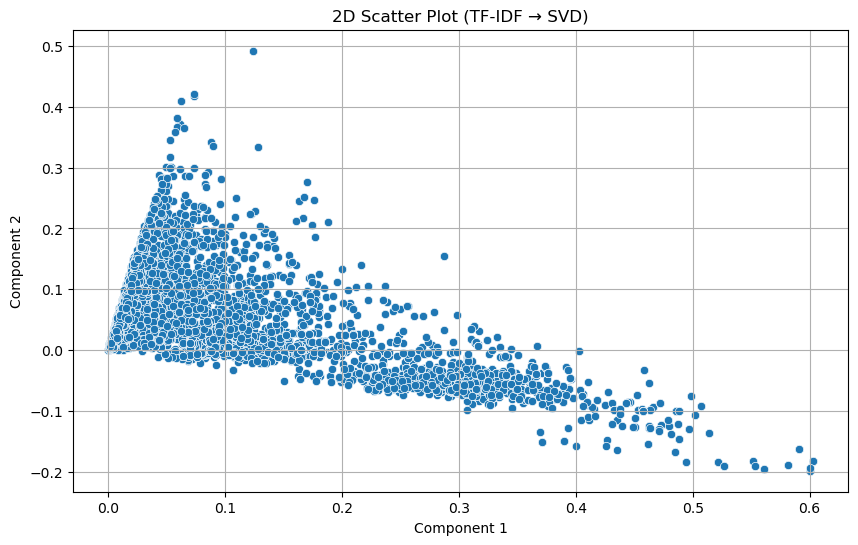

In [7]:
# showcasing  the top two
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_matrix[:, 0], y=reduced_matrix[:, 1])
plt.title("2D Scatter Plot (TF-IDF → SVD)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


In [9]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(reduced_matrix)

# Calculate silhouette score
sil_score = silhouette_score(reduced_matrix, labels)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.5119897194808354


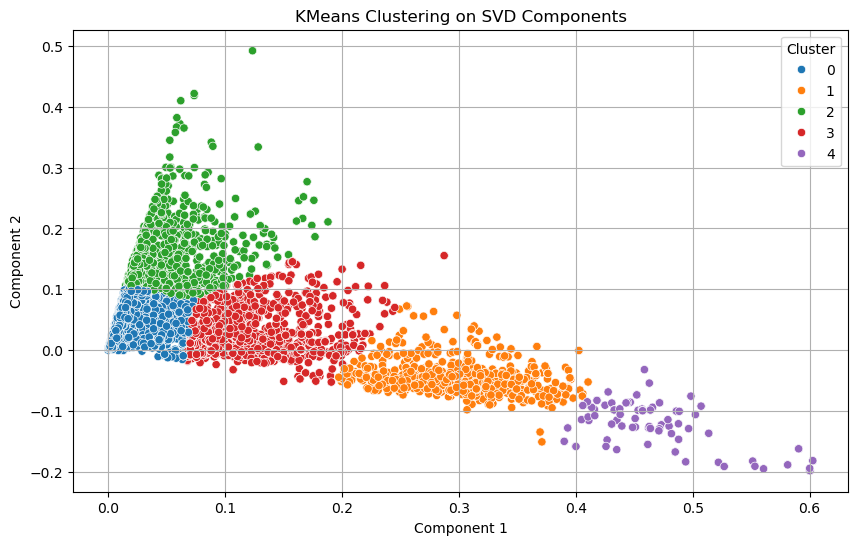

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_matrix[:, 0], y=reduced_matrix[:, 1], hue=labels, palette='tab10')
plt.title("KMeans Clustering on SVD Components")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
